# Card Tricks!

The best way to understand type-token systems is by playing around with an ordinary deck of playing cards.

For the sake of all exercises, assume a standard American 52-card deck, four suits of thirteen valors, no jokers. We'll be considering valors as the thirteen "types" of token in the deck.

In [1]:
# bloody dependencies
from math import sqrt, comb, factorial as fact
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# globals
N_TOKENS = 52
N_TYPES = 13
N_TOKENS_PER_TYPE = 4
HAND_SIZE = 5  # arbitrary, using five-card hand poker odds for reference

## Five Card Poker Hands

Here are the odds of all five-card poker hands. Source: [Wikipedia](https://en.wikipedia.org/wiki/Poker_probability#Frequency_of_5-card_poker_hands):

- Total possible hands: $2598960 = 100\%$
- Royal Flush: $4 = 0.000154\%$
- Straight Flush: $36 = 0.00139\%$
- Four of a Kind: $624 = 0.02401\%$
- Full House: $3744 = 0.1441\%$
- Flush: $5108 = 0.1965\%$
- Straight: $10200 = 0.3925\%$
- Three of a Kind: $54912 = 2.1128\%$
- Two Pair: $123552 = 4.7539\%$
- One Pair: $1098240 = 42.2569\%$
- No Pair: $1302540 = 50.1177\%$


In [2]:
# poker hands
royal_flush = 4
straight_flush = 36
four_of_a_kind = 624
full_house = 3744
flush = 5108
straight = 10200
three_of_a_kind = 54912
two_pair = 123552
one_pair = 1098240
no_pair = 1302540
total = sum([
    royal_flush,
    straight_flush,
    four_of_a_kind,
    full_house,
    flush,
    straight,
    three_of_a_kind,
    two_pair,
    one_pair,
    no_pair,
])
print("Total Poker Hands:", total)
fmt = lambda x: f"{x} = {(x / total):.9f}"
print(f"Royal Flush: {fmt(royal_flush)}")
print(f"Straight Flush: {fmt(straight_flush)}")
print(f"Four of a Kind: {fmt(four_of_a_kind)}")
print(f"Full House: {fmt(full_house)}")
print(f"Flush: {fmt(flush)}")
print(f"Straight: {fmt(straight)}")
print(f"Three of a Kind: {fmt(three_of_a_kind)}")
print(f"Two Pair: {fmt(two_pair)}")
print(f"One Pair: {fmt(one_pair)}")
print(f"No Pair: {fmt(no_pair)}")

Total Poker Hands: 2598960
Royal Flush: 4 = 0.000001539
Straight Flush: 36 = 0.000013852
Four of a Kind: 624 = 0.000240096
Full House: 3744 = 0.001440576
Flush: 5108 = 0.001965402
Straight: 10200 = 0.003924647
Three of a Kind: 54912 = 0.021128451
Two Pair: 123552 = 0.047539016
One Pair: 1098240 = 0.422569028
No Pair: 1302540 = 0.501177394


## Five Card Poker Hands (Boring Version)

Now, I propose a new game called "Boring Poker" in which Straights and Flushes don't exist. Since neither straights nor flushes contain any pairs, this renders these hands worthless, sending them to the No Pair designation:

- Total possible hands: $2598960 = 100\%$
- ~~Royal Flush~~
- ~~Straight Flush~~
- Four of a Kind: $624 = 0.02401\%$
- Full House: $3744 = 0.1441\%$
- ~~Flush~~
- ~~Straight~~
- Three of a Kind: $54912 = 2.1128\%$
- Two Pair: $123552 = 4.7539\%$
- One Pair: $1098240 = 42.2569\%$
- No Pair (plus Straight, Flush, Straight Flush, and Royal Flush): $1302540 + 10200 + 5108 + 36 + 4 = 1317888 = 50.7083\%$

In [3]:
# boring poker hands
no_pair_boring = no_pair + straight + flush + straight_flush + royal_flush
total = sum([
    four_of_a_kind,
    full_house,
    three_of_a_kind,
    two_pair,
    one_pair,
    no_pair_boring,
])
print("Total Poker Hands:", total)
fmt = lambda x: f"{x} = {(x / total):.9f}"
print(f"Four of a Kind: {fmt(four_of_a_kind)}")
print(f"Full House: {fmt(full_house)}")
print(f"Three of a Kind: {fmt(three_of_a_kind)}")
print(f"Two Pair: {fmt(two_pair)}")
print(f"One Pair: {fmt(one_pair)}")
print(f"No Pair: {fmt(no_pair_boring)}")

Total Poker Hands: 2598960
Four of a Kind: 624 = 0.000240096
Full House: 3744 = 0.001440576
Three of a Kind: 54912 = 0.021128451
Two Pair: 123552 = 0.047539016
One Pair: 1098240 = 0.422569028
No Pair: 1317888 = 0.507082833


## Bounded Partitions

Why on earth would I ruin a perfectly good game? Because each of these simpler hands can be represented as [partitions](https://en.wikipedia.org/wiki/Partition_(number_theory)). For example we can represent Four of a Kind as $4+1$, a Full House as $3+2$, Two Pair as $2+2+1$, et cetera. Now, these are [_bounded_ partitions](https://en.wikipedia.org/wiki/Partition_(number_theory)#Partitions_in_a_rectangle_and_Gaussian_binomial_coefficients) because we can't hold more than four of a kind and we can't hold more than thirteen valors. Therefore, although there are seven partitions of five, there are only _six_ "Boring Poker" hands with five cards, because "Five of a Kind" is excluded. More generally, we are restricted to partitions with no more than thirteen parts, each of size no more than four, i.e. partitions _bounded_ in a four-by-thirteen rectangle:

- ~~Five of a Kind~~: $5$
- Four of a Kind: $4+1$
- Full House: $3+2$
- Three of a Kind: $3+1+1$
- Two Pair: $2+2+1$
- One Pair: $2+1+1+1$
- No Pair: $1+1+1+1+1$

In [ ]:
# REF: https://en.wikipedia.org/wiki/Partition_(number_theory)#Partitions_in_a_rectangle_and_Gaussian_binomial_coefficients
class BoundedPartition:
    
    def __init__(self):
        self._data = {}
        
    def get(self, N, M, n):
        key = (N, M, n)
        if key not in self._data.keys():
            self._data[key] = self.calculate(*key)
        val = self._data[key]
        return val
    
    def calculate(self, N, M, n):
        
        # degenerate input
        if N < 0 or M < 0 or n < 0:
            return 0
        
        # null set is the only "partition" of zero
        if n <= 0:
            return 1
        
        # box too big
        if n > N * M:
            return 0
        
        # box "just right"
        if n == N * M:
            return 1
        
        # recurse
        key1 = (N, M-1, n)
        key2 = (N-1, M, n-M)
        val1 = self.get(*key1)
        val2 = self.get(*key2)
        val = val1 + val2
        return val
    
# sanity check
rp = BoundedPartition()
answer = rp.get(N_TOKENS_PER_TYPE, N_TYPES, HAND_SIZE)
print(f"p({N_TOKENS_PER_TYPE}, {N_TYPES}, {HAND_SIZE}) =", answer)

# full trace
# NOTE: @Mathematica: Series[QBinomial[13+4, 13, q], {q, 0, 52}] // Normal
calculated = pd.Series([rp.get(N_TOKENS_PER_TYPE, N_TYPES, n) for n in range(N_TOKENS+1)])
display(calculated.values)

# visualize hands per hand size
plt.figure(figsize=(20, 10))
plt.scatter(calculated.index, calculated.values)
plt.legend()
plt.xlabel("Hand Size (Number of Cards Drawn)")
plt.ylabel("Number of Hands")
plt.title(f"Number of Hands by Hand Size (Valors = {N_TYPES} Types)")
plt.show()

## Legomena Vectors

Now, let's group the elements of each of these partitions into a vector, $\hat{k} = (k_1, k_2, k_3, k_4)$, where $k_1$ denotes the number of singles $S$, $k_2$ the number of pairs $P$, $k_3$ the number of triples $T$, and $k_4$ the number of quadruples $Q$:

- Four of a Kind: $4+1 = 1S + 0P + 0T+ 1Q = \hat{k} = (1, 0, 0, 1)$
- Full House: $3+2 = 0S + 1P + 1T+ 0Q =\hat{k} = (0, 1, 1, 0)$
- Three of a Kind: $3+1+1 = 2S + 0P + 1T+ 0Q =\hat{k} = (2, 0, 1, 0)$
- Two Pair: $2+2+1 = 1S + 2P + 0T+ 0Q =\hat{k} = (1, 2, 0, 0)$
- One Pair: $2+1+1+1 = 3S + 1P + 0T+ 0Q =\hat{k} = (3, 1, 0, 0)$
- No Pair: $1+1+1+1+1 = 5S + 0P + 0T+ 0Q =\hat{k} = (5, 0, 0, 0)$

Or as a matrix, if you prefer...

$$
\begin{matrix}
FK \to \\
FH \to \\
TK \to \\
TP \to \\
OP \to \\
NP \to
\end{matrix}
\begin{bmatrix}
1 & 0 & 0 & 1 \\
0 & 1 & 1 & 0 \\
2 & 0 & 1 & 0 \\
1 & 2 & 0 & 0 \\
3 & 1 & 0 & 0 \\
5 & 0 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
S \\
P \\
T \\
Q
\end{bmatrix}
$$

These are the _legomena vectors_ for each hand. The word "legomena" comes from the greek [hapax legomenon](https://en.wikipedia.org/wiki/Hapax_legomenon), referring to words that only appear _once_ in a given text. A [dis legomenon](https://en.wiktionary.org/wiki/dis_legomenon) refers to a word that appears _exactly twice_, [tris legomenon](https://en.wiktionary.org/wiki/tris_legomenon) to a word that appears _exactly three times_, and so on. Bundling these all into a single entity, we get a _legomena vector_, counting off how many _of how many_ of each type of object we have in a given collection, a metacount.

### The Calculation of Odds

Now, with the caveat that we are working in the game of _Boring Poker_, not regular poker, let's work out the odds of each hand via formula. Borrowing from [Wikipedia](https://en.wikipedia.org/wiki/Poker_probability#Frequency_of_5-card_poker_hands) again, and making adjustments to suit our new rules, the odds are:

- Four of a Kind: $\hat{k} = (1, 0, 0, 1) = {13 \choose 1} {4 \choose 4}^1 {12 \choose 1} {4 \choose 1}^1 = 624$
- Full House: $\hat{k} = (0, 1, 1, 0) = {13 \choose 1} {4 \choose 3}^1 {12 \choose 1} {4 \choose 2}^1 = 3744$
- Three of a Kind: $\hat{k} = (2, 0, 1, 0) = {13 \choose 1} {4 \choose 3}^1 {12 \choose 2} {4 \choose 1}^2 = 54912$
- Two Pair: $\hat{k} = (1, 2, 0, 0) = {13 \choose 2} {4 \choose 2}^2 {11 \choose 1} {4 \choose 1}^1 = 123552$
- One Pair: $\hat{k} = (3, 1, 0, 0) = {13 \choose 1} {4 \choose 2}^1 {12 \choose 3} {4 \choose 1}^3 = 1098240$
- No Pair: $\hat{k} = (5, 0, 0, 0) = \binom{13}{5} \binom{4}{1}^5 = 1317888$

In [4]:
# sanity check: boring poker five-card hand odds
n_total = comb(52, 5)
n_four_of_a_kind = comb(13, 1) * comb(4, 4)**1 * comb(12, 1) * comb(4, 1)**1
n_full_house = comb(13, 1) * comb(4, 3)**1 * comb(12, 1) * comb(4, 2)**1
n_three_of_a_kind = comb(13, 1) * comb(4, 3)**1 * comb(12, 2) * comb(4, 1)**2
n_two_pair = comb(13, 2) * comb(4, 2)**2 * comb(11, 1) * comb(4, 1)**1
n_one_pair = comb(13, 1) * comb(4, 2)**1 * comb(12, 3) * comb(4, 1)**3
n_no_pair  = comb(13, 5) * comb(4, 1)**5

# display
print("Total Poker Hands:", n_total)
fmt = lambda x: f"{x} = {(x / n_total):.9f}"
print(f"Four of a Kind: {fmt(n_four_of_a_kind)}")
print(f"Full House: {fmt(n_full_house)}")
print(f"Three of a Kind: {fmt(n_three_of_a_kind)}")
print(f"Two Pair: {fmt(n_two_pair)}")
print(f"One Pair: {fmt(n_one_pair)}")
print(f"No Pair: {fmt(n_no_pair)}")

Total Poker Hands: 2598960
Four of a Kind: 624 = 0.000240096
Full House: 3744 = 0.001440576
Three of a Kind: 54912 = 0.021128451
Two Pair: 123552 = 0.047539016
One Pair: 1098240 = 0.422569028
No Pair: 1317888 = 0.507082833


## Generalization

Let's generalize this combinatorial formula, re-deriving it to calculate all possible metacounts for all hand sizes besides just five.

Notice, we can prepend $\hat{k}$ by a $k_0$ count indicating the number of _undrawn_ types. For example, No Pair means I drew five distinct cards, so there are eight valors left undrawn. Whereas Four of a Kind means I drew only two distinct cards (one set of four plus one high card), so there are eleven valors left undrawn. Hence, we can rewrite $\hat{k} = (k_1, k_2, k_3, k_4) = (5, 0, 0, 0)$ as $\hat{k} = (k_0, k_1, k_2, k_3, k_4) = (8, 5, 0, 0, 0)$.

Notice, with this extra entry, the matrix representation takes on two definitional identities:

1. The row sums are constant, i.e. $k_0 + k_1 + k_2 + k_3 + k_4 = N$, the number of types

$$
\begin{bmatrix}
11 & 1 & 0 & 0 & 1 \\
11 & 0 & 1 & 1 & 0 \\
10 & 2 & 0 & 1 & 0 \\
10 & 1 & 2 & 0 & 0 \\
9 & 3 & 1 & 0 & 0 \\
8 & 5 & 0 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
1 \\
1 \\
1 \\
1 \\
1
\end{bmatrix}
=
\begin{bmatrix}
13 \\
13 \\
13 \\
13 \\
13
\end{bmatrix}
$$

2. Each row, when dotted with the "identity" vector $\hat{k} \cdot (0, 1, 2, 3, 4) = M$, the number of tokens drawn.

$$
\begin{bmatrix}
11 & 1 & 0 & 0 & 1 \\
11 & 0 & 1 & 1 & 0 \\
10 & 2 & 0 & 1 & 0 \\
10 & 1 & 2 & 0 & 0 \\
9 & 3 & 1 & 0 & 0 \\
8 & 5 & 0 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
0 \\
1 \\
2 \\
3 \\
4
\end{bmatrix}
=
\begin{bmatrix}
5 \\
5 \\
5 \\
5 \\
5
\end{bmatrix}
$$

In [5]:
# metacount matrix
M = np.array([
    [11, 1, 0, 0, 1],
    [11, 0, 1, 1, 0],
    [10, 2, 0, 1, 0],
    [10, 1, 2, 0, 0],
    [ 9, 3, 1, 0, 0],
    [ 8, 5, 0, 0, 0],
])
O = np.array([
    [1],
    [1],
    [1],
    [1],
    [1],
])
I = np.array([
    [0],
    [1],
    [2],
    [3],
    [4],
])
display(np.dot(M, O))
display(np.dot(M, I))

array([[13],
       [13],
       [13],
       [13],
       [13],
       [13]])

array([[5],
       [5],
       [5],
       [5],
       [5],
       [5]])

## Combinatorically Speaking

Let's just review for a moment where those Wikipedia formulas came from, and get a closed-form combinatoric expression for it. Using four-of-a-kind as a working example...

$$ f\big( \langle 11, 1, 0, 0, 1 \rangle \big) = {13 \choose 1} {4 \choose 4}^1 {12 \choose 1} {4 \choose 1}^1 = 624 $$

In English, term-by-term, we are instructed to...
1. From the 13 available valors, pick 1: ${13 \choose 1} = 13$ ways to do this.
2. Pick _all four_ of this valor's suits: ${4 \choose 4}^1 = 1$ way only to do this. 
3. Now from the 12 valors left, pick 1: ${12 \choose 1} = 12$ ways to do this.
4. Pick _one_ of this valor's suits: ${4 \choose 1}^1 = 4$ ways to do this.
5. Since these are all independent events, multiply $13 \cdot 1 \cdot 12 \cdot 4 = 624$

Picks 1-2 is your set of four "of a kind", picks 3-4 is your leftover fifth card. But order doesn't matter, and in fact I can "mechanize" this list by starting with the _eleven_ valors to _not_ pick, and proceding exhaustively, like this:

$$ f\big( \langle 11, 1, 0, 0, 1 \rangle \big) = {13 \choose 11} {4 \choose 0}^{11} \cdot {2 \choose 1} {4 \choose 1}^1 \cdot {1 \choose 0} {4 \choose 2}^0 \cdot {1 \choose 0} {4 \choose 3}^0 \cdot {1 \choose 1} {4 \choose 4}^1 = 624 $$

$$ f\big( \langle k_0, k_1, k_2, k_3, k_4 \rangle \big) = {13 \choose k_0} {4 \choose 0}^{k_0} {13 - k_0 \choose k_1} {4 \choose 1}^{k_1} {13 - k_0 - k_1 \choose k_2} {4 \choose 2}^{k_2} {13 - k_0 - k_1 - k_2 \choose k_3} {4 \choose 3}^{k_3} {13 - k_0 - k_1 - k_2 - k_3 \choose k_4} {4 \choose 4}^{k_4} $$

This can be separated into two components, the number of suit picks and the number of valor picks:

$$ S\big( \hat{k} \big) = {4 \choose 0}^{k_0} {4 \choose 1}^{k_1} {4 \choose 2}^{k_2} {4 \choose 3}^{k_3} {4 \choose 4}^{k_4} = \prod_{i=0}^4 {4 \choose i}^{k_i} = 4 $$

$$ V\big( \hat{k} \big) = {13 \choose k_0} {13 - k_0 \choose k_1} {13 - k_0 - k_1 \choose k_2} {13 - k_0 - k_1 - k_2 \choose k_3} {13 - k_0 - k_1 - k_2 - k_3 \choose k_4} = 156 $$

Because order doesn't matter, the cascading logic of the valor pick count simplifies to:

$$ V\big( \hat{k} \big) = \frac{13!}{\prod_{i=0}^4 k_i!} $$

Therefore, this can all be written as a "one-liner":

$$ f\big( \hat{k} \big) = S\big( \hat{k} \big) V\big( \hat{k} \big) = 13! \prod_{i=0}^4 \frac{1}{k_i!} {4 \choose i}^{k_i} $$

In [6]:
# util: get metacounts
def get_metacounts():
    pad_hex = lambda x: "{0:#0{1}x}".format(x,7)[2:]
    sum_of_hex_digits = lambda h: sum([int(d, 16) for d in h])
    padded = [pad_hex(x) for x in range(16**5)]
    metacounts = [p for p in padded if sum_of_hex_digits(p) == 13]
    return metacounts

def as_vector(metacount):
    return np.array([int(digit, 16) for digit in metacount])

# metacounts
metacounts = get_metacounts()
df = pd.DataFrame({"metacounts":metacounts})

# number of cards (hand size) per metacount
df["n_cards"] = df["metacounts"].apply(lambda metacount: sum(np.arange(5) * as_vector(metacount)))

def binom_vector(n):
    return np.array([comb(n, k) for k in range(n+1)])

def n_suits(metacount):
    return np.prod(binom_vector(4) ** as_vector(metacount))

def n_valors(metacount):
    return int(fact(13) / np.prod([ fact(elem) for elem in as_vector(metacount) ]))

def n_hands(metacount):
    return n_valors(metacount) * n_suits(metacount)

# number of hands per metacount
df["n_hands"] = df["metacounts"].apply(n_hands)

# hand details
df["n_undrawn"] = df["metacounts"].apply(lambda metacount: int(metacount[0:1], 16))
df["n_singles"] = df["metacounts"].apply(lambda metacount: int(metacount[1:2], 16))
df["n_pairs"] = df["metacounts"].apply(lambda metacount: int(metacount[2:3], 16))
df["n_triples"] = df["metacounts"].apply(lambda metacount: int(metacount[3:4], 16))
df["n_quadruples"] = df["metacounts"].apply(lambda metacount: int(metacount[4:5], 16))
df["n_drawn"] = N_TYPES - df["n_undrawn"]

# recap
df.query(f"n_cards == {HAND_SIZE}")

,metacounts,n_cards,n_hands,n_undrawn,n_singles,n_pairs,n_triples,n_quadruples,n_drawn
2309,85000,5,1317888,8,5,0,0,0,5
2343,93100,5,1098240,9,3,1,0,0,4
2360,a1200,5,123552,10,1,2,0,0,3
2362,a2010,5,54912,10,2,0,1,0,3
2369,b0110,5,3744,11,0,1,1,0,2
2371,b1001,5,624,11,1,0,0,1,2


### Great Expectations

Now we have the probabilities of each hand. Let's ask a related question: What is the _expected_ number of singles, pairs, etc in a random hand? There's a $50.71\%$ chance of getting _no_ pairs, a $42.40\%$ chance of getting _one_ pair (One Pair $42.26\%$ plus Full House $0.14\%$), and a $4.75\%$ chance of getting _two_ pairs. Add them all up, and you get $k_2(5) = 0.5071(0) + 0.4240(1) + 0.0475(2) = 0.5191$

In [8]:
# expected average of legomena counts
s_expected_4 = 1 * (n_four_of_a_kind)
s_expected_3 = 1 * (n_three_of_a_kind + n_full_house)
s_expected_2 = 1 * (n_one_pair + n_full_house) + 2 * (n_two_pair)
s_expected_1 = 1 * (n_four_of_a_kind + n_two_pair) + 2 * (n_three_of_a_kind) + 3 * (n_one_pair) + 5 * (n_no_pair)
s_expected_0 = 8 * (n_no_pair) + 9 * (n_one_pair) + 10 * (n_two_pair + n_three_of_a_kind) + 11 * (n_full_house + n_four_of_a_kind)

sums = np.array([s_expected_0, s_expected_1, s_expected_2, s_expected_3, s_expected_4])
counts = sums / n_total
n_expected_0, n_expected_1, n_expected_2, n_expected_3, n_expected_4 = counts

print("Expected quadruples:", n_expected_4.round(4))
print("Expected triples:", n_expected_3.round(4))
print("Expected pairs:", n_expected_2.round(4))
print("Expected singles:", n_expected_1.round(4))
print("Expected not-drawn:", n_expected_0.round(4))
print("Expected drawn:", (N_TYPES - n_expected_0).round(4))

Expected quadruples: 0.0002
Expected triples: 0.0226
Expected pairs: 0.5191
Expected singles: 3.8932
Expected not-drawn: 8.5649
Expected drawn: 4.4351


### Generalized Expectations

In [9]:
# calculate expectations
df_expected = (df
.assign(t_undrawn = lambda row: row.n_hands * row.n_undrawn)
.assign(t_singles = lambda row: row.n_hands * row.n_singles)
.assign(t_pairs = lambda row: row.n_hands * row.n_pairs)
.assign(t_triples = lambda row: row.n_hands * row.n_triples)
.assign(t_quadruples = lambda row: row.n_hands * row.n_quadruples)
.assign(t_drawn = lambda row: row.n_hands * row.n_drawn)
.groupby("n_cards")
.sum()
.assign(undrawn = lambda row: row.t_undrawn / row.n_hands)
.assign(singles = lambda row: row.t_singles / row.n_hands)
.assign(pairs = lambda row: row.t_pairs / row.n_hands)
.assign(triples = lambda row: row.t_triples / row.n_hands)
.assign(quadruples = lambda row: row.t_quadruples / row.n_hands)
.assign(drawn = lambda row: row.t_drawn / row.n_hands)
)[["undrawn", "singles", "pairs", "triples", "quadruples", "drawn"]]
df_expected

,undrawn,singles,pairs,triples,quadruples,drawn
n_cards,,,,,,
0,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,12.000000,1.000000,0.000000,0.000000,0.000000,1.000000
2,11.058824,1.882353,0.058824,0.000000,0.000000,1.941176
3,10.174118,2.654118,0.169412,0.002353,0.000000,2.825882
4,9.343577,3.322161,0.324994,0.009220,0.000048,3.656423
5,8.564946,3.893157,0.519088,0.022569,0.000240,4.435054
6,7.836014,4.373589,0.745498,0.044178,0.000720,5.163986
7,7.154622,4.769748,0.998319,0.075630,0.001681,5.845378
8,6.518655,5.087731,1.271933,0.118319,0.003361,6.481345


### Visualize It

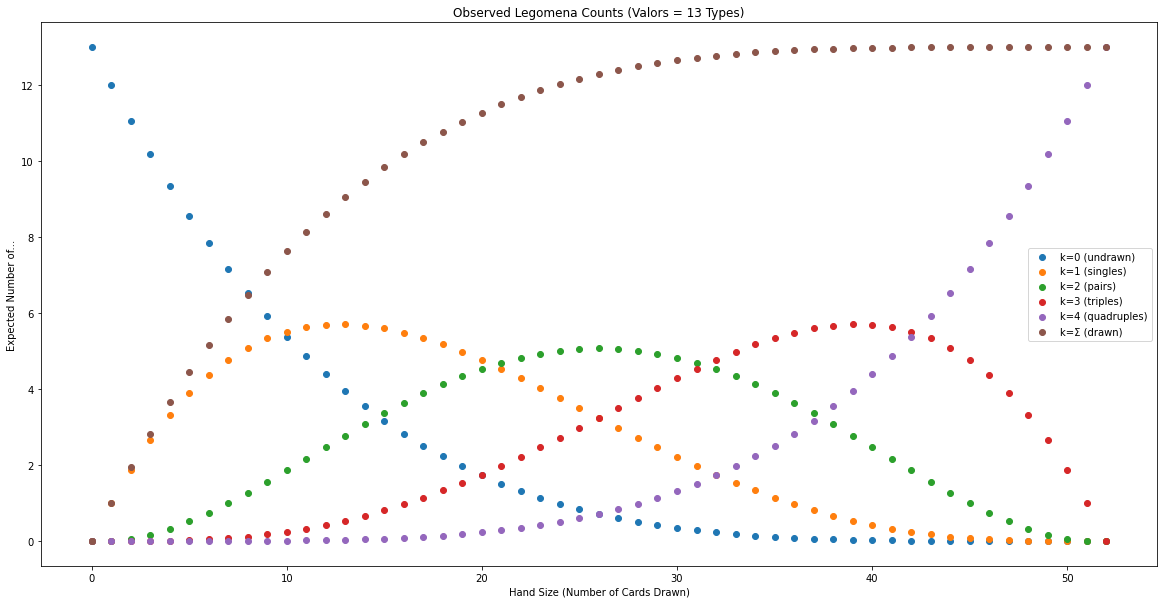

In [10]:
# visualize observed data
plt.figure(figsize=(20, 10))
xvals = df_expected.index
for k, col in enumerate(df_expected.columns):
    get_label = lambda k, col: f"k={k if k <= N_TOKENS_PER_TYPE else 'Σ'} ({col})"
    plt.scatter(xvals, df_expected[col], label=get_label(k, col))
plt.xlabel("Hand Size (Number of Cards Drawn)")
plt.ylabel("Expected Number of...")
plt.title(f"Observed Legomena Counts (Valors = {N_TYPES} Types)")
plt.legend()
plt.show()

## Recursive Formula

**TODO**: Intuit recursive formula.

In [11]:
# recursive formula
prediction1 = [N_TYPES]
recurse = lambda seq: seq[-1] - N_TOKENS_PER_TYPE * seq[-1] / (N_TOKENS - len(seq)+1)
for _ in range(N_TOKENS):
    prediction1 = prediction1 + [recurse(prediction1)]
prediction1 = np.array(prediction1)

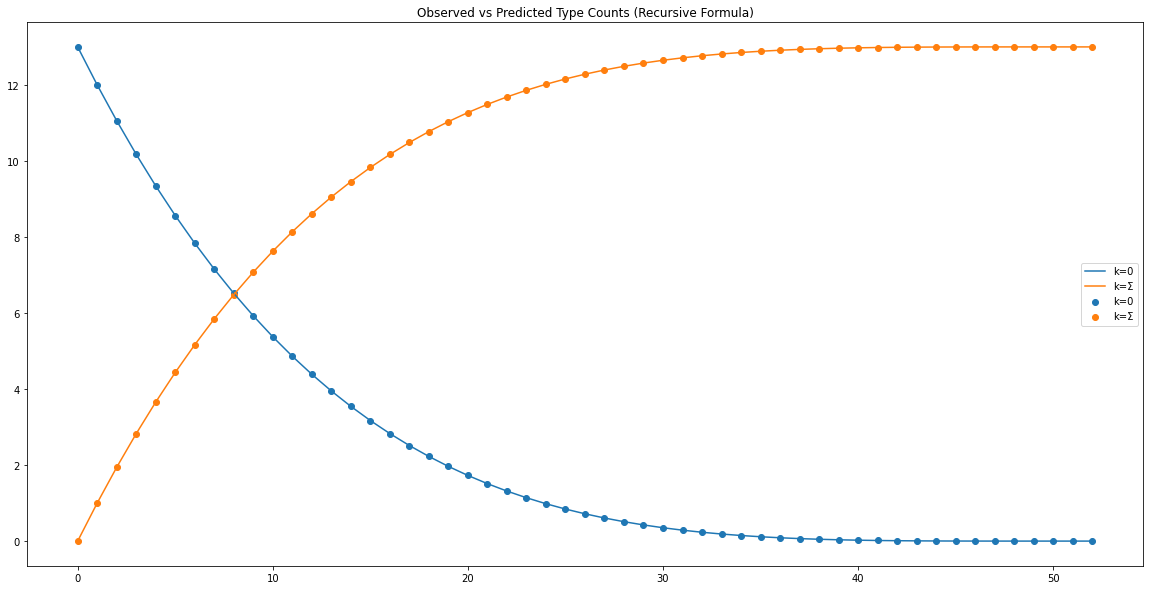

In [12]:
# visualize predictions
plt.figure(figsize=(20, 10))

# observed
xvals = df_expected.index
plt.scatter(xvals, df_expected["undrawn"], label="k=0")
plt.scatter(xvals, df_expected["drawn"], label="k=Σ")

# predicted
plt.plot(xvals, prediction1, label="k=0")
plt.plot(xvals, N_TYPES - prediction1, label="k=Σ")

# display
plt.title("Observed vs Predicted Type Counts (Recursive Formula)")
plt.legend()
plt.show()

## Analytic Formula (Expected Types)

**TODO**: Intuit analytic formula.

$k_0(m) = 13 \big(1-\frac{m}{52}\big)^{4} = 13 \big(1-x\big)^{4} = 13 - 52 x + 78 x^2 - 52 x^3 + 13 x^4$

In [13]:
# analytic formula (type counts only)
prediction2 = N_TYPES * (1 - xvals / N_TOKENS)**N_TOKENS_PER_TYPE

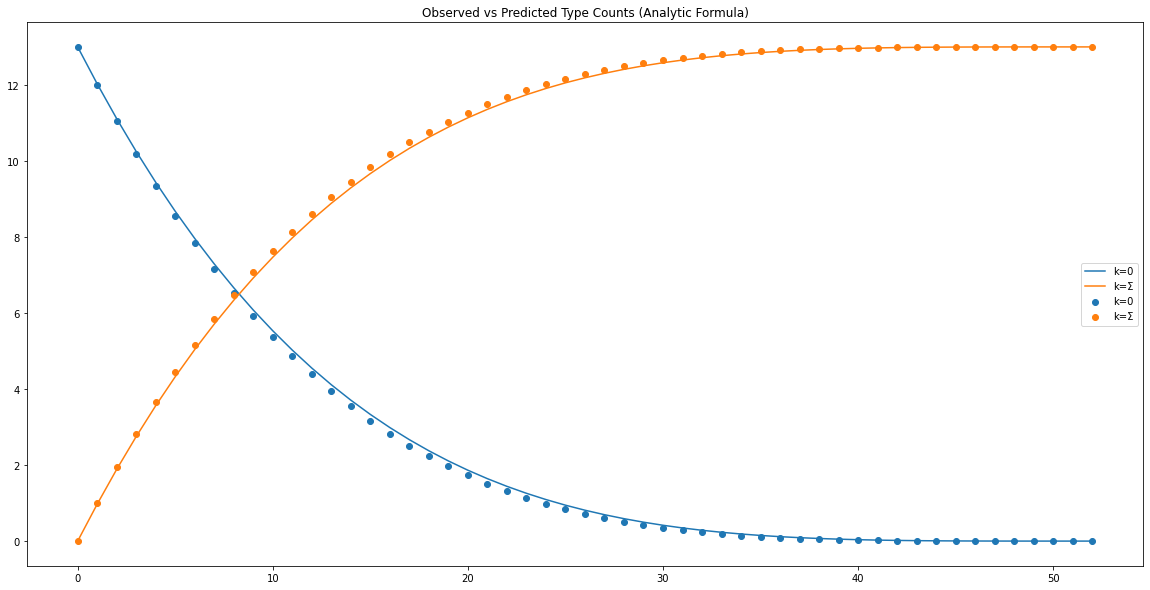

In [14]:
# visualize predictions
plt.figure(figsize=(20, 10))

# observed
xvals = df_expected.index
plt.scatter(xvals, df_expected["undrawn"], label="k=0")
plt.scatter(xvals, df_expected["drawn"], label="k=Σ")

# predicted
plt.plot(xvals, prediction2, label="k=0")
plt.plot(xvals, N_TYPES - prediction2, label="k=Σ")

# display
plt.title("Observed vs Predicted Type Counts (Analytic Formula)")
plt.legend()
plt.show()

## Analytic Formula (Legomena Counts)

**TODO**: Intuit analytic formula.

$k_0(m) = 13 \big(1-\frac{m}{52}\big)^{4} = 13 - 52 x + 78 x^2 - 52 x^3 + 13 x^4$

$k_1(m) = 13 {4 \choose 1} \big(\frac{m}{52}\big)^{1} \big(1-\frac{m}{52}\big)^{3} = 52 x - 156 x^2 + 156 x^3 - 52 x^4$

$k_2(m) = 13 {4 \choose 2} \big(\frac{m}{52}\big)^{2} \big(1-\frac{m}{52}\big)^{2} = 78 x^4 - 156 x^3 + 78 x^2$

$k_3(m) = 13 {4 \choose 3} \big(\frac{m}{52}\big)^{3} \big(1-\frac{m}{52}\big)^{1} = 52 x^3 - 52 x^4$

$k_3(m) = 13 \big(\frac{m}{52}\big)^{4} = 13 x^4$

$k_s(m) = k {n \choose s} \big(\frac{m}{kn}\big)^{s} \big(1-\frac{m}{kn}\big)^{n - s}$

In [15]:
# analytic formula (all legomena)
formula = lambda k, n, s: k * comb(n, s) * (xvals / N_TOKENS)**s * (1 - xvals / N_TOKENS)**(n - s)
apply_formula = lambda k, n: np.stack([ formula(k, n, s) for s in range(n+1) ], axis=1)
prediction3 = apply_formula(N_TYPES, N_TOKENS_PER_TYPE)
df_formula = pd.DataFrame(prediction3)
df_formula.index.name = "n_cards"
df_formula.columns = ["undrawn", "singles", "pairs", "triples", "quadruples"]
df_formula["drawn"] = N_TYPES - df_formula["undrawn"]

# recap
df_formula

,undrawn,singles,pairs,triples,quadruples,drawn
n_cards,,,,,,
0,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,12.028478,0.943410,0.027747,0.000363,0.000002,0.971522
2,11.112454,1.777993,0.106680,0.002845,0.000028,1.887546
3,10.249774,2.510149,0.230524,0.009409,0.000144,2.750226
4,9.438325,3.146108,0.393264,0.021848,0.000455,3.561675
5,8.676037,3.691931,0.589138,0.041783,0.001111,4.323963
6,7.960884,4.153505,0.812642,0.070665,0.002304,5.039116
7,7.290881,4.536548,1.058528,0.109773,0.004269,5.709119
8,6.664087,4.846609,1.321802,0.160218,0.007283,6.335913


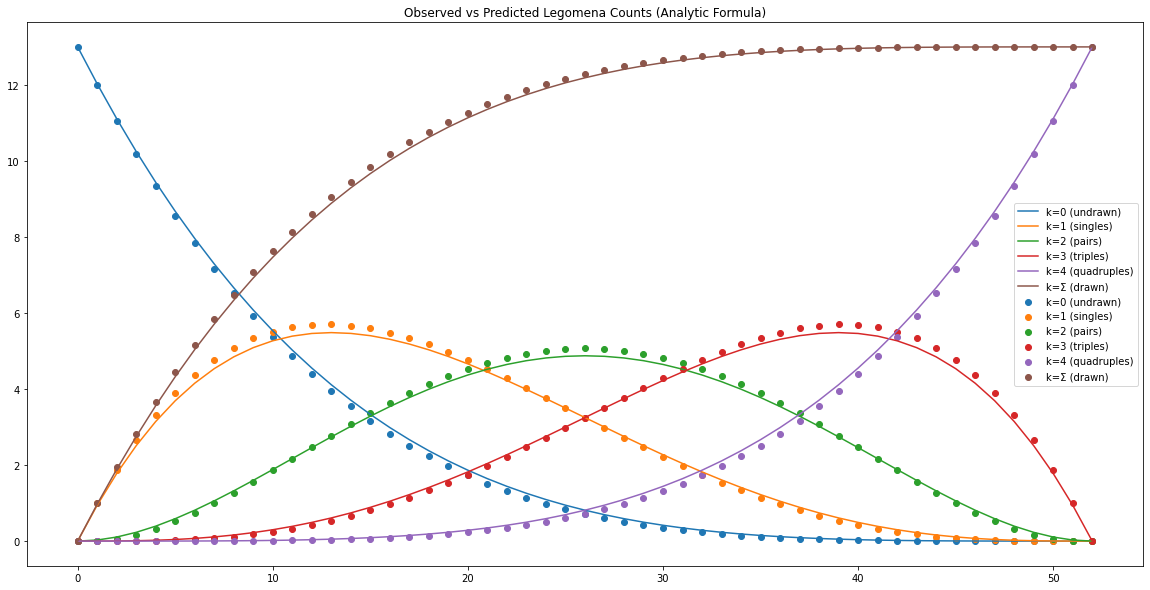

In [16]:
# visualize predictions
plt.figure(figsize=(20, 10))

# expected
xvals = df_expected.index
get_label = lambda k, col: f"k={k if k <= N_TOKENS_PER_TYPE else 'Σ'} ({col})"
for k, col in enumerate(df_expected.columns):
    plt.scatter(xvals, df_expected[col], label=get_label(k, col))

# predicted
for k, col in enumerate(df_formula.columns):
    plt.plot(xvals, df_formula[col], label=get_label(k, col))

# display
plt.title(f"Observed vs Predicted Legomena Counts (Analytic Formula)")
plt.legend()
plt.show()

### Bernstein Polynomials

Look familiar? For reasons utterly mysterious to me, this plot we've built up, step by step, from scratch, is coalescing on a familiar, previously known phenomenon:

![](https://upload.wikimedia.org/wikipedia/commons/5/59/Bernstein_Polynomials.svg)

In fact, there's no need to overlay the [Bernstein Polynomials](https://en.wikipedia.org/wiki/Bernstein_polynomial) over our observed data or our analytical formulas, because our analytical formulas _are_ the [Bernstein Polynomials](https://en.wikipedia.org/wiki/Bernstein_polynomial), merely with a slight change in notation: $b_{s, n} = k_s(m)$.

**TODO**: WHY?

### Accuracy

To be clear, our analytic formulas are _not_ exact. The expected vs observed average number of pairs in a five-card hand is off by $13.5\%$

- Expected: $k_2(5) = 0.589$
- Observed: $k_2(5) = 0.519$

In [17]:
# expected pairs in a five-card hand
pred = df_formula.loc[5]["pairs"]
real = df_expected.loc[5]["pairs"]
print("Predicted:", pred)
print("Expected:", real)

# error
print("Error (%):", (pred - real) / real)

# residuals
df_residuals = df_formula - df_expected
df_residuals

Predicted: 0.5891378868912153
Expected: 0.5190876350540216
Error (%): 0.13494879690190187


,undrawn,singles,pairs,triples,quadruples,drawn
n_cards,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.028478,-0.056590,0.027747,0.000363,0.000002,-0.028478
2,0.053631,-0.104360,0.047856,0.002845,0.000028,-0.053631
3,0.075657,-0.143969,0.061112,0.007056,0.000144,-0.075657
4,0.094748,-0.176053,0.068270,0.012628,0.000407,-0.094748
5,0.111091,-0.201227,0.070050,0.019214,0.000871,-0.111091
6,0.124870,-0.220085,0.067144,0.026487,0.001584,-0.124870
7,0.136260,-0.233199,0.060209,0.034143,0.002588,-0.136260
8,0.145432,-0.241122,0.049870,0.041899,0.003921,-0.145432


### Residuals

But when we plot the residuals, we get another beautiful and unexpected surprise. Far from being Gaussian, the errors themselves form a beautiful plot, begging deeper explanation.

Coef: 1.5708203281312392x^0 + -3.1992797118847016x^1 + 1.6290836334533367x^2
Coef: -3.183673469387758x^0 + 9.656726690676281x^1 + -6.516334533813532x^2
Coef: 1.6555102040816336x^0 + -9.7745018007203x^1 + 9.774501800720294x^2
Coef: -0.04328131252500584x^0 + 3.3759423769507477x^1 + -6.516334533813483x^2
Coef: 0.0006242496998748472x^0 + -0.05888755502197121x^1 + 1.6290836334533356x^2
Coef: -1.5708203281312356x^0 + 3.1992797118846754x^1 + -1.6290836334533065x^2


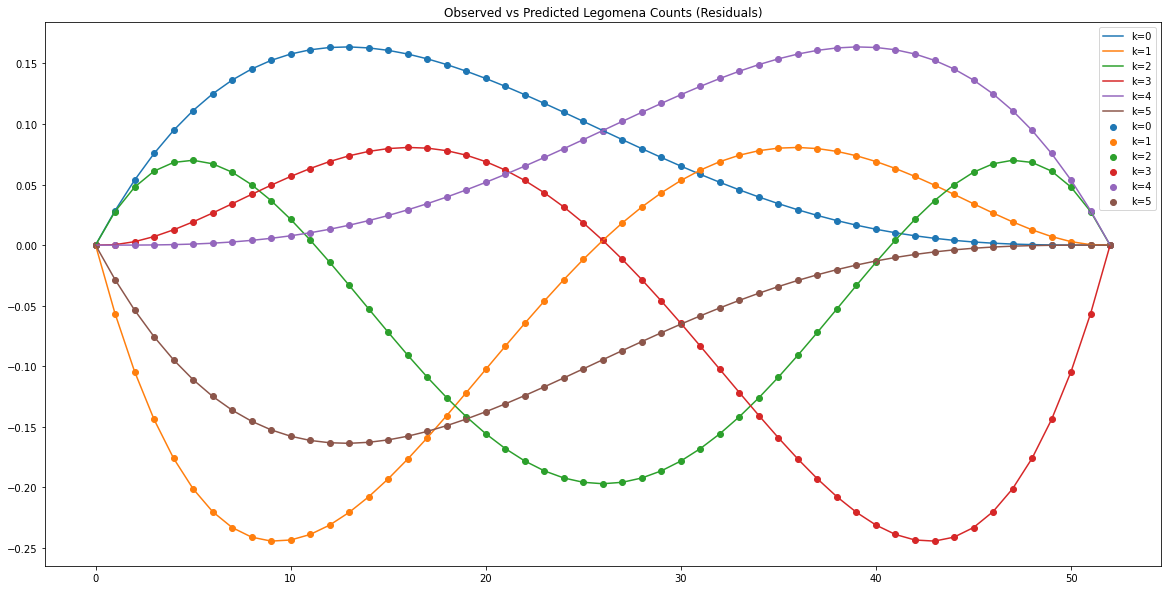

In [18]:
# UTIL: interpolate noisy data
def interp_series(series, degree):
    series = series.loc[1:51]
    xvals, yvals = series.index / N_TOKENS, series.values
    yvals = yvals / xvals / (1-xvals)
    degree -= 2
    coef_ = np.polyfit(xvals, yvals, deg=degree)
    coef_ = np.flip(coef_)
    fmt = lambda coefs: " + ".join([f"{coef}x^{i}" for i, coef in enumerate(coefs)])
    print("Coef:", fmt(coef_))
    X = np.array([xvals**power for power in range(degree+1)])
    preds = np.matmul(X.T, np.expand_dims(coef_, axis=1))
    preds = np.squeeze(preds)
    preds = preds * xvals * (1-xvals)
    preds = np.concatenate((np.array([0]), preds, np.array([0])))
    return preds
    
def interp_data(df, degree):
    data = np.array([interp_series(df[col], degree) for col in df.columns]).T
    preds = pd.DataFrame(data, df.index, df.columns)
    return preds

# visualize residuals
df_residuals_polyfit = interp_data(df_residuals, degree=N_TOKENS_PER_TYPE)
plt.figure(figsize=(20, 10))
xvals = df_residuals.index / N_TOKENS
for k, col in enumerate(df_residuals.columns):
    plt.scatter(df_residuals.index, df_residuals[col], label=f"k={k}")
    plt.plot(df_residuals_polyfit.index, df_residuals_polyfit[col], label=f"k={k}")
plt.title(f"Observed vs Predicted Legomena Counts (Residuals)")
plt.legend()
plt.show()

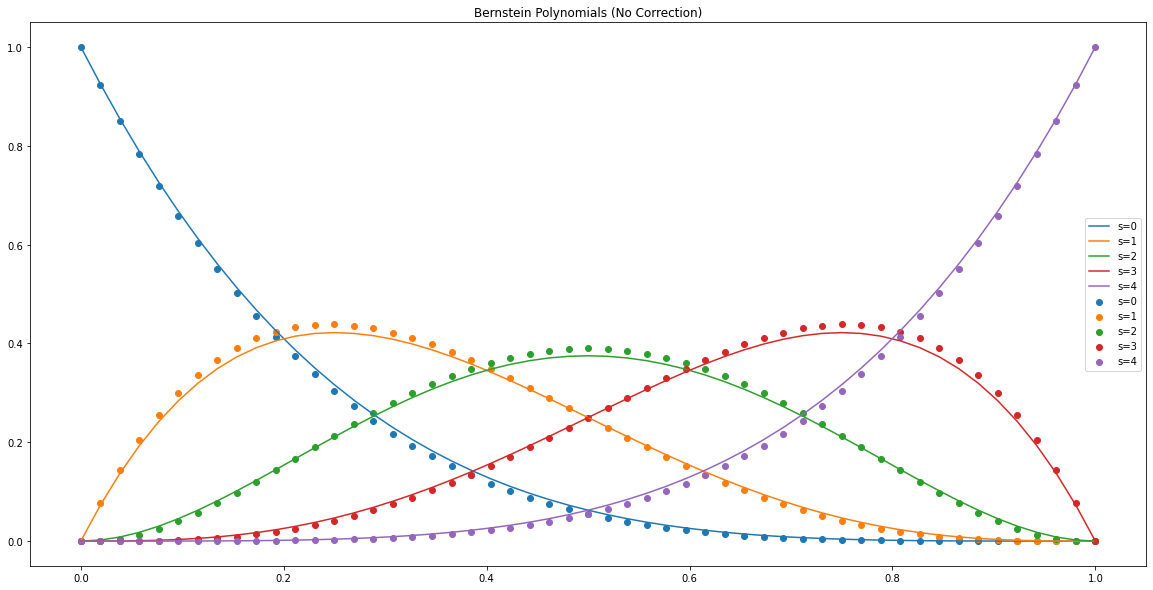

Interpolation of First-Order Error:
Coef: -0.12083233293317257x^0 + 0.2460984393757474x^1 + -0.12531412565025754x^2
Coef: 0.24489795918367335x^0 + -0.7428251300520202x^1 + 0.5012565026010397x^2
Coef: -0.12734693877551026x^0 + 0.7518847539015608x^1 + -0.7518847539015606x^2
Coef: 0.0033293317326926835x^0 + -0.25968787515005703x^1 + 0.5012565026010367x^2
Coef: -4.8019207682779816e-05x^0 + 0.004529811924767803x^1 + -0.12531412565025754x^2


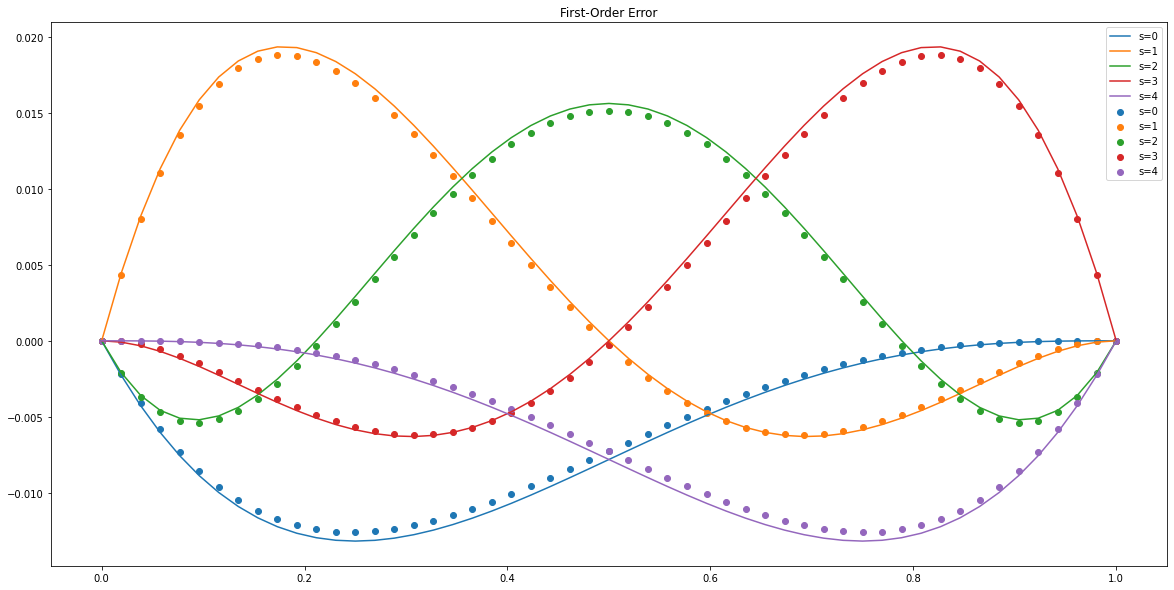

Interpolation of Second-Order Error:
Coef: 0.004167667066827453x^0 + -0.0039015606242525894x^1 + -0.00031412565025768196x^2
Coef: -0.005102040816326694x^0 + 0.007174869947979694x^1 + 0.0012565026010400622x^2
Coef: -0.0023469387755103164x^0 + 0.0018847539015610128x^1 + -0.0018847539015609443x^2
Coef: 0.003329331732692716x^0 + -0.009687875150057165x^1 + 0.0012565026010368228x^2
Coef: -4.8019207682799556e-05x^0 + 0.004529811924767815x^1 + -0.0003141256502575655x^2


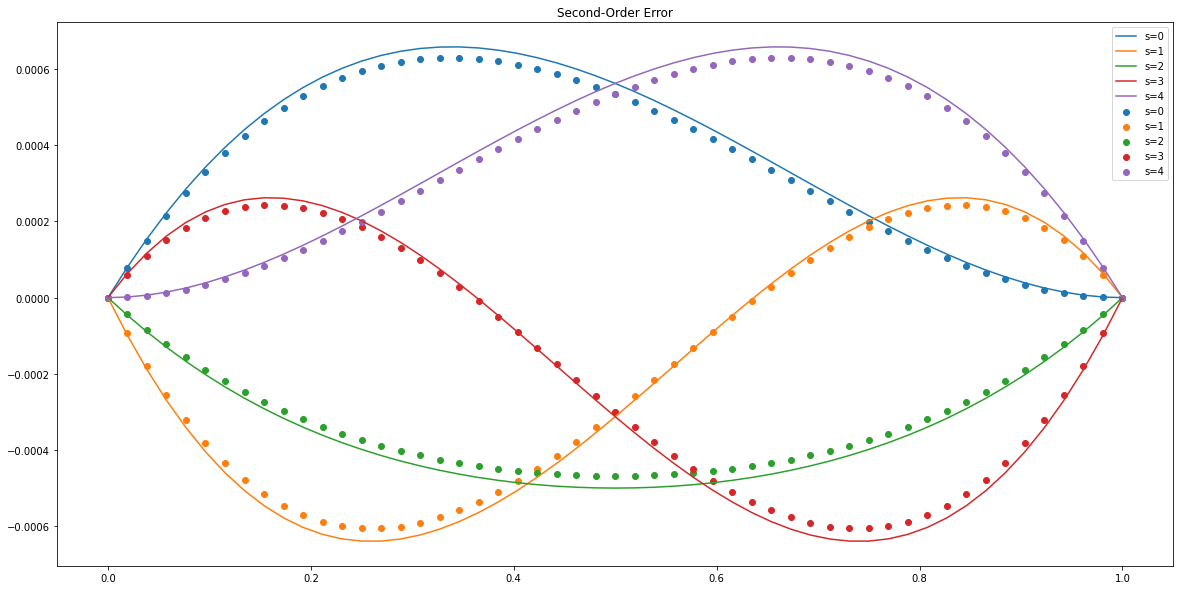

Interpolation of Third-Order Error:
Coef: -0.00016566626650588254x^0 + 9.843937574742247e-05x^1 + 1.920768307564069e-05x^2
Coef: 0.0002991671993645468x^0 + -0.0004608794167361279x^1 + -7.683073229326065e-05x^2
Coef: 0.0001530612244896847x^0 + -0.00011524609843899383x^1 + 0.00011524609843906141x^2
Coef: -0.00023854294966518845x^0 + 0.0006145408813253142x^1 + -7.683073229651083e-05x^2
Coef: -4.80192076827989e-05x^0 + -0.0001368547418988488x^1 + 1.9207683075765758e-05x^2


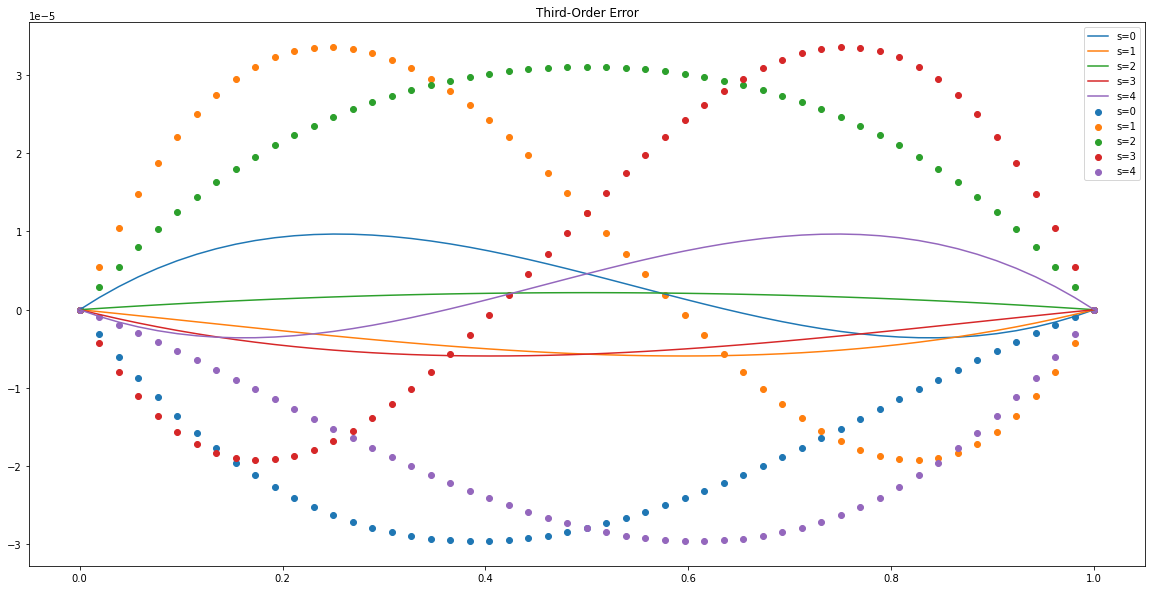

Interpolation of Fourth-Order Error:
Coef: -0.00016566626650588254x^0 + 9.843937574742247e-05x^1 + 1.920768307564069e-05x^2
Coef: 0.0002991671993645468x^0 + -0.0004608794167361279x^1 + -7.683073229326065e-05x^2
Coef: 0.0001530612244896847x^0 + -0.00011524609843899383x^1 + 0.00011524609843906141x^2
Coef: -0.00023854294966518845x^0 + 0.0006145408813253142x^1 + -7.683073229651083e-05x^2
Coef: -4.80192076827989e-05x^0 + -0.0001368547418988488x^1 + 1.9207683075765758e-05x^2


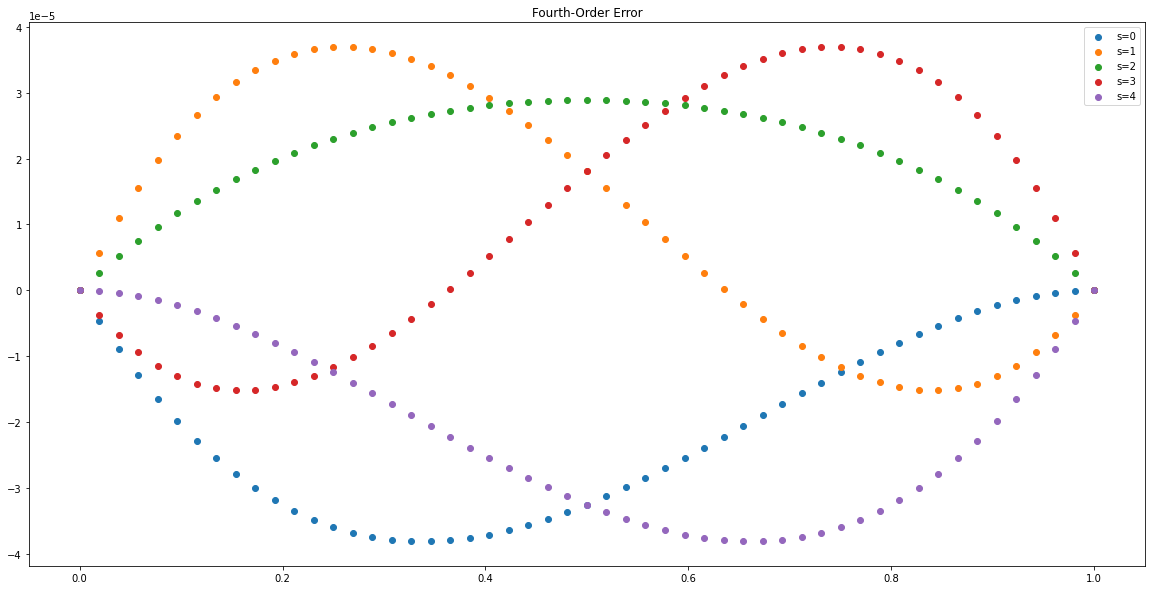

In [19]:
# (x, y) actual values
x = df_expected.index / N_TOKENS
y = df_expected / N_TYPES
del y["drawn"]

# bernstein polynomials
bernstein = pd.DataFrame(np.array([
    (1-x)**4,
    4*x*(1-x)**3,
    6*x**2*(1-x)**2,
    4*x**3*(1-x),
    x**4
]).T)
bernstein.index = y.index
bernstein.columns = y.columns
plt.figure(figsize=(20, 10))
for s, col in enumerate(y.columns):
    plt.scatter(x, y[col], label=f"s={s}")
    plt.plot(x, bernstein[col], label=f"s={s}")
plt.legend()
plt.title("Bernstein Polynomials (No Correction)")
plt.show()

# first-order error
err1 = y - bernstein
print("Interpolation of First-Order Error:")
interp1 = interp_data(err1, degree=N_TOKENS_PER_TYPE)
D = 0.283953711108641
D = 1/2/sqrt(3)
fix1 = pd.DataFrame(np.array([
    -1/8*x*(1-x)*(x-1)*(x-1),
    +4/8*x*(1-x)*(x-1)*(x-0.5),
    -6/8*x*(1-x)*(x-(0.5-D))*(x-(0.5+D)),
    +4/8*x*(1-x)*x*(x-0.5),
    -1/8*x*(1-x)*x*x,
]).T)
fix1.index = err1.index
fix1.columns = err1.columns
plt.figure(figsize=(20, 10))
for s, col in enumerate(err1.columns):
    plt.scatter(x, err1[col], label=f"s={s}")
    # plt.plot(x, interp1[col], label=f"s={s}")
    plt.plot(x, fix1[col], label=f"s={s}")
plt.legend()
plt.title("First-Order Error")
plt.show()

# second-order error
err2 = y - bernstein - fix1
print("Interpolation of Second-Order Error:")
interp2 = interp_data(err2, degree=N_TOKENS_PER_TYPE)
D = 0.35509554140671906
D = -3 + sqrt(181)/4
fix2 = pd.DataFrame(np.array([
    -1/3000 * x * (1-x) * (x+13) * (x-1),
    +4/3000 * x * (1-x) * (x-1+D) * (x+6+D),
    -6/3000 * x * (1-x) * ((x-0.5)**2+1),
    +4/3000 * x * (1-x) * (x-D) * (x-1-6-D),
    -1/3000 * x * (1-x) * (x-0) * (x-1-13),
]).T)
fix2.index = err2.index
fix2.columns = err2.columns
plt.figure(figsize=(20, 10))
for s, col in enumerate(err2.columns):
    plt.scatter(x, err2[col], label=f"s={s}")
#     plt.plot(x, interp2[col], label=f"s={s}")
    plt.plot(x, fix2[col], label=f"s={s}")
plt.legend()
plt.title("Second-Order Error")
plt.show()

# third-order error
err3 = y - bernstein - fix1 - fix2
print("Interpolation of Third-Order Error:")
interp3 = interp_data(err3, degree=N_TOKENS_PER_TYPE)
D = 0.638429
H = 0.655931
fix3 = pd.DataFrame(np.array([
    -1/18083673 * x * (1-x) * (x+(2400+D)) * (x-D), #(x**2 + 2400*x - 1532.63643),
    +4/18083673 * x * (1-x) * (x+H) * (x-(90-H)), #(x**2 + -(86.68919874 + 2)*x - 58.60426507),
    -6/18083673 * x * (1-x) * (x**2 - x - 26), #25.88636361),  # 26),  # 
    +4/18083673 * x * (1-x) * (x-1-H) * (x-1+(90-H)), #(x**2 + 86.68919874*x - 146.29346467),
    -1/18083673 * x * (1-x) * (x-1-(2400+D)) * (x-1+D), #(x**2 - (2400 + 2)*x + 868.363676),
]).T)
fix3.index = err3.index
fix3.columns = err3.columns
plt.figure(figsize=(20, 10))
for s, col in enumerate(err3.columns):
    plt.scatter(x, err3[col], label=f"s={s}")
#     plt.plot(x, interp3[col], label=f"s={s}")
    plt.plot(x, fix3[col], label=f"s={s}")
plt.legend()
plt.title("Third-Order Error")
plt.show()

# fourth-order error
err4 = y - bernstein - fix1 - fix2 - fix3
print("Interpolation of Fourth-Order Error:")
interp4 = interp_data(err3, degree=N_TOKENS_PER_TYPE)
# fix4 = pd.DataFrame(np.array([
#     +1/18083673 * x * (1-x) * (x+(2400+D)) * (x-D), #(x**2 + 2400*x - 1532.63643),
#     -4/18083673 * x * (1-x) * (x+H) * (x-(90-H)), #(x**2 + -(86.68919874 + 2)*x - 58.60426507),
#     +6/18083673 * x * (1-x) * (x**2 - x - 26),  # 25.88636361),
#     -4/18083673 * x * (1-x) * (x-1-H) * (x-1+(90-1+H)), #(x**2 + 86.68919874*x - 146.29346467),
#     +1/18083673 * x * (1-x) * (x-1-(2400+D)) * (x-1+D), #(x**2 - (2400 + 2)*x + 868.363676),
# ]).T)
# fix4.index = err4.index
# fix4.columns = err4.columns
plt.figure(figsize=(20, 10))
for s, col in enumerate(err4.columns):
    plt.scatter(x, err4[col], label=f"s={s}")
#     plt.plot(x, interp4[col], label=f"s={s}")
#     plt.plot(x, fix4[col], label=f"s={s}")
plt.legend()
plt.title("Fourth-Order Error")
plt.show()

## Infinite Regress

Now, this is exceedingly bizarre. The residuals appear to be functions of Bernstein's even derivatives...

$$
\hat{B}(x)
\begin{Bmatrix}
B_0(x) \\
B_1(x) \\
B_2(x) \\
B_3(x) \\
B_4(x)
\end{Bmatrix}
=
\begin{Bmatrix}
(1-x)^4 \\
4x(1-x)^3 \\
6x^2(1-x)^2 \\
4x^3(1-x) \\
x^4
\end{Bmatrix}
=
\begin{Bmatrix}
x^4 - 4x^3 + 6x^2 - 4x + 1 \\
-4x^4 + 12x^3 - 12x^2 + 4x \\
6x^4 - 12x^3 + 6x^2 \\
-4x^4 + 4x^3 \\
x^4
\end{Bmatrix}
$$

$$
\frac{d^2}{dx^2}\big[\hat{B}(x)\big]
\begin{Bmatrix}
B_0''(x) \\
B_1''(x) \\
B_2''(x) \\
B_3''(x) \\
B_4''(x)
\end{Bmatrix}
=
\begin{Bmatrix}
1 \cdot 12 (x-1)(x-1) \\
-4 \cdot 12 (x-1)(x-\frac{1}{2}) \\
6 \cdot 12 \big(x-\frac{1}{2}\big(1+\frac{\sqrt{3}}{3}\big)\big)\big(x-\frac{1}{2}\big(1-\frac{\sqrt{3}}{3}\big)\big) \\
-4 \cdot 12 (x-0)(x-\frac{1}{2}) \\
1 \cdot 12 (x-0)(x-0)
\end{Bmatrix}
=
\begin{Bmatrix}
12x^2 - 24x + 12 \\
-48x^2 + 72x - 24 \\
72x^2 - 72x + 12 \\
-48x^2 + 24x \\
12x^2
\end{Bmatrix}
$$

$$
\frac{d^4}{dx^4}\big[\hat{B}(x)\big]
\begin{Bmatrix}
B_0^{(4)}(x) \\
B_1^{(4)}(x) \\
B_2^{(4)}(x) \\
B_3^{(4)}(x) \\
B_4^{(4)}(x)
\end{Bmatrix}
=
\begin{Bmatrix}
? \\
? \\
? \\
? \\
?
\end{Bmatrix}
=
\begin{Bmatrix}
? \\
? \\
? \\
? \\
?
\end{Bmatrix}
$$

$$
\hat{r}_1(x) = \frac{x(1-x)}{96}\hat{B}''(x)
$$

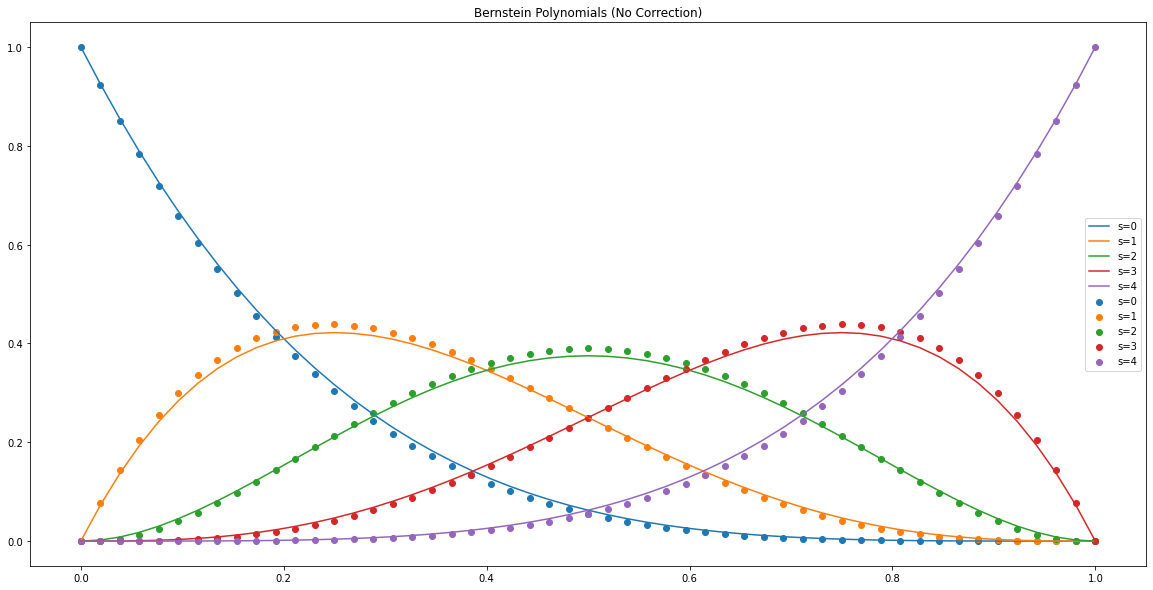

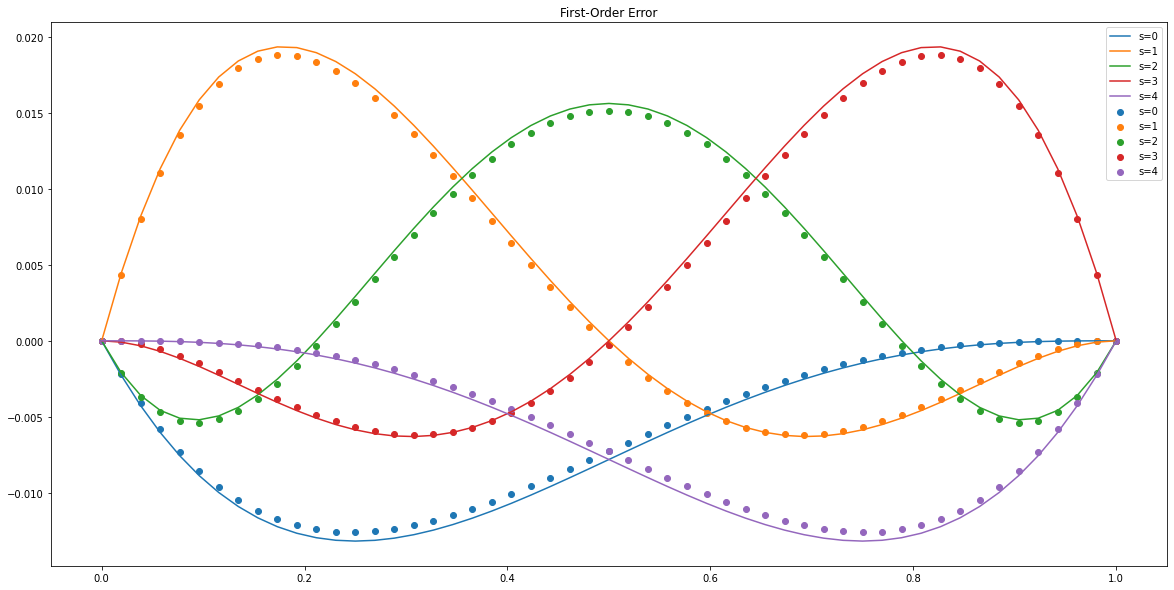

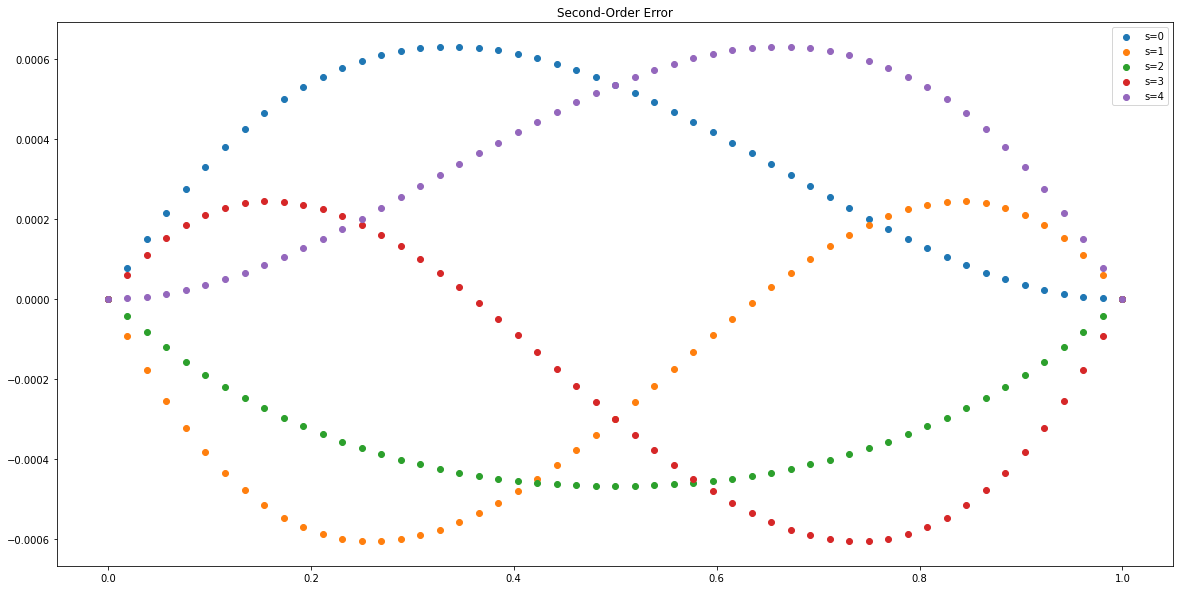

In [20]:
# (x, y) actual values
x = df_expected.index / N_TOKENS
y = df_expected / N_TYPES
del y["drawn"]

# bernstein polynomials
bernstein = pd.DataFrame(np.array([
    (1-x)**4,
    4*x*(1-x)**3,
    6*x**2*(1-x)**2,
    4*x**3*(1-x),
    x**4
]).T)
bernstein.index = y.index
bernstein.columns = y.columns
plt.figure(figsize=(20, 10))
for s, col in enumerate(y.columns):
    plt.scatter(x, y[col], label=f"s={s}")
    plt.plot(x, bernstein[col], label=f"s={s}")
plt.legend()
plt.title("Bernstein Polynomials (No Correction)")
plt.show()

# first-order error
err1 = y - bernstein
S = -x*(1-x)/96
fix1 = pd.DataFrame(np.array([
    S * (+12*x**2 -24*x +12),
    S * (-48*x**2 +72*x -24),
    S * (+72*x**2 -72*x +12),
    S * (-48*x**2 +24*x),
    S * (+12*x**2)
]).T)
fix1.index = err1.index
fix1.columns = err1.columns
plt.figure(figsize=(20, 10))
for s, col in enumerate(err1.columns):
    plt.scatter(x, err1[col], label=f"s={s}")
    plt.plot(x, fix1[col], label=f"s={s}")
plt.legend()
plt.title("First-Order Error")
plt.show()

# second-order error
err2 = y - bernstein - fix1
# interp2 = interp_data(err2, degree=N_TOKENS_PER_TYPE)
# D = 0.35509554140671906
# D = -3 + sqrt(181)/4
# fix2 = pd.DataFrame(np.array([
#     +1/3184 * x * (1-x) * (x+13) * (x-1),
#     -4/3184 * x * (1-x) * (x-1+D) * (x+6+D),
#     +6/3184 * x * (1-x) * ((x-0.5)**2+1),
#     -4/3184 * x * (1-x) * (x-D) * (x-1-6-D),
#     +1/3184 * x * (1-x) * (x-0) * (x-1-13),
# ]).T)
# fix2.index = err2.index
# fix2.columns = err2.columns
plt.figure(figsize=(20, 10))
for s, col in enumerate(err2.columns):
    plt.scatter(x, err2[col], label=f"s={s}")
#     plt.plot(x, interp2[col], label=f"s={s}")
#     plt.plot(x, fix2[col], label=f"s={s}")
plt.legend()
plt.title("Second-Order Error")
plt.show()

# # third-order error
# err3 = bernstein - y - fix1 - fix2
# interp3 = interp_data(err3, degree=N_TOKENS_PER_TYPE)
# D = 0.638429
# H = 0.655931
# fix3 = pd.DataFrame(np.array([
#     +1/18083673 * x * (1-x) * (x+(2400+D)) * (x-D), #(x**2 + 2400*x - 1532.63643),
#     -4/18083673 * x * (1-x) * (x+H) * (x-(90-H)), #(x**2 + -(86.68919874 + 2)*x - 58.60426507),
#     +6/18083673 * x * (1-x) * (x**2 - x - 25.88636361),  # 26),  # 
#     -4/18083673 * x * (1-x) * (x-1-H) * (x-1+(90-H)), #(x**2 + 86.68919874*x - 146.29346467),
#     +1/18083673 * x * (1-x) * (x-1-(2400+D)) * (x-1+D), #(x**2 - (2400 + 2)*x + 868.363676),
# ]).T)
# fix3.index = err3.index
# fix3.columns = err3.columns
# plt.figure(figsize=(20, 10))
# for s, col in enumerate(err3.columns):
#     plt.scatter(x, err3[col], label=f"s={s}")
# #     plt.plot(x, interp3[col], label=f"s={s}")
#     plt.plot(x, fix3[col], label=f"s={s}")
# plt.legend()
# plt.title("Third-Order Error")
# plt.show()

# # fourth-order error
# err4 = bernstein - y - fix1 - fix2 - fix3
# interp4 = interp_data(err3, degree=N_TOKENS_PER_TYPE)
# # fix4 = pd.DataFrame(np.array([
# #     +1/18083673 * x * (1-x) * (x+(2400+D)) * (x-D), #(x**2 + 2400*x - 1532.63643),
# #     -4/18083673 * x * (1-x) * (x+H) * (x-(90-H)), #(x**2 + -(86.68919874 + 2)*x - 58.60426507),
# #     +6/18083673 * x * (1-x) * (x**2 - x - 26),  # 25.88636361),
# #     -4/18083673 * x * (1-x) * (x-1-H) * (x-1+(90-1+H)), #(x**2 + 86.68919874*x - 146.29346467),
# #     +1/18083673 * x * (1-x) * (x-1-(2400+D)) * (x-1+D), #(x**2 - (2400 + 2)*x + 868.363676),
# # ]).T)
# # fix4.index = err4.index
# # fix4.columns = err4.columns
# plt.figure(figsize=(20, 10))
# for s, col in enumerate(err4.columns):
#     plt.scatter(x, err4[col], label=f"s={s}")
# #     plt.plot(x, interp4[col], label=f"s={s}")
# #     plt.plot(x, fix4[col], label=f"s={s}")
# plt.legend()
# plt.title("Fourth-Order Error")
# plt.show()